In [1]:
from sklearn import model_selection
from sklearn import metrics
import os
import numpy as np
import pandas as pd
from MicroBiome import MicroBiomeDataSet, Trainer, TrainTester, MultiTrainTester
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Load Data

In [2]:
top_dir = '/project'
data_dir = os.path.join(top_dir, 'data')
preproc_dir = os.path.join(data_dir, 'preprocessed')
inp_dir = os.path.join(preproc_dir, 'Gupta_2020_Precompiled_Cleaned')

In [3]:
os.listdir(inp_dir)

['MatrixDataClean.csv', 'SampleMetaDataClean.csv', 'FeatMetaDataClean.csv']

In [4]:
MatrixData = np.loadtxt(os.path.join(inp_dir, 'MatrixDataClean.csv'))
MatrixData.shape

(4347, 903)

In [5]:
SampleMeta = pd.read_csv(os.path.join(inp_dir, 'SampleMetaDataClean.csv'))
SampleMeta

,6,study,Study No. (From VG sheet (V-*) from SB sheet (S-*)),Title of Paper,Author (year),Journal,Study Accession,Sample Accession or Sample ID,Sample title (ENA/SRA),Sample title (Paper),...,Use of milk or milk products (Yes/No/Sometimes),Use of Animal Product- Meat (Yes/No/Vegetarian/Vegan),Alcohol Consumption (Yes/No),Diet1,Intervention for study (Diet),Intervention for study (medication),Sequencing Platform,Library layout (SINGLE/PAIRED),Read count after Quality control,Healthy
0,SAMEA104142287,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142287,ZSL-004,ZSL-004,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,43356775.0,Unhealthy
1,SAMEA104142288,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142288,ZSL-007,ZSL-007,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,41073871.0,Unhealthy
2,SAMEA104142293,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142293,ZSL-010,ZSL-010,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,40199673.0,Unhealthy
3,SAMEA104142291,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142291,ZSL-011,ZSL-011,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,31054158.0,Unhealthy
4,SAMEA104142284,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142284,ZSL-019,ZSL-019,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,36081150.0,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4342,SAMEA4431948,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431948,SZAXPI029564-74,SZAXPI029564-74,...,NaN,NaN,NaN,NaN,No,No,Illumina HiSeq 2000,PAIRED,52212493.0,Unhealthy
4343,SAMEA4431949,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431949,SZAXPI029565-77,SZAXPI029565-77,...,NaN,NaN,NaN,NaN,No,No,Illumina HiSeq 2000,PAIRED,50635879.0,Unhealthy
4344,SAMEA4431951,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431951,SZAXPI029567-80,SZAXPI029567-80,...,NaN,NaN,NaN,NaN,No,No,Illumina HiSeq 2000,PAIRED,40712962.0,Unhealthy
4345,SAMEA4431964,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431964,SZAXPI029580-98,SZAXPI029580-98,...,NaN,NaN,NaN,NaN,No,No,Illumina HiSeq 2000,PAIRED,38177360.0,Unhealthy


In [6]:
FeatMeta = pd.read_csv(os.path.join(inp_dir, 'FeatMetaDataClean.csv'))
FeatMeta

,Unnamed: 0,feature
0,s__Abiotrophia_defectiva,s__Abiotrophia_defectiva
1,s__Acetobacter_unclassified,s__Acetobacter_unclassified
2,s__Achromobacter_piechaudii,s__Achromobacter_piechaudii
3,s__Achromobacter_unclassified,s__Achromobacter_unclassified
4,s__Achromobacter_xylosoxidans,s__Achromobacter_xylosoxidans
...,...,...
898,s__Weissella_koreensis,s__Weissella_koreensis
899,s__Weissella_paramesenteroides,s__Weissella_paramesenteroides
900,s__Weissella_unclassified,s__Weissella_unclassified
901,s__Wohlfahrtiimonas_chitiniclastica,s__Wohlfahrtiimonas_chitiniclastica


# Define and Train Model

In [7]:
# random seed here deals with model initialization
clf = RandomForestClassifier()
param_grid = {'n_estimators': [5, 10, 25, 50],
             'max_depth': [1, 3, 5]}
model = model_selection.GridSearchCV(clf, param_grid, scoring = metrics.make_scorer(metrics.balanced_accuracy_score), cv = 5)
MyTrainer = Trainer(model = model, scale_X = True, use_pca = True, n_components = 100)
# random seed used in class definition is not used in final output models
MyTrainTester = TrainTester(MyTrainer, metrics.balanced_accuracy_score)
# note that random seed here affects sequence of seeds passed to making new TrainTester objects
# using LRTrainTester as template. Thus, you have all settings but seed affecting sample split
# across all data splits
n_splits = 5
MyMultiTrainTester = MultiTrainTester(MyTrainTester, numpy_rand_seed = 42, n_splits = n_splits)

In [8]:
y = SampleMeta['Healthy'].to_numpy().astype('str') == 'Healthy'
y = y.astype('int64')

In [9]:
MyMultiTrainTester.train(MatrixData, y)

Running for split 1 of 5
Running for split 2 of 5
Running for split 3 of 5
Running for split 4 of 5
Running for split 5 of 5


In [10]:
scores_df = pd.DataFrame({'score': MyMultiTrainTester.train_scores, 'stage' : np.repeat('train', n_splits)})
scores_df = scores_df.append(pd.DataFrame({'score': MyMultiTrainTester.test_scores, 'stage' : np.repeat('test', n_splits)}))
scores_df

,score,stage
0,0.808224,train
1,0.787315,train
2,0.794285,train
3,0.806251,train
4,0.801842,train
0,0.693333,test
1,0.697224,test
2,0.701298,test
3,0.679730,test
4,0.691518,test


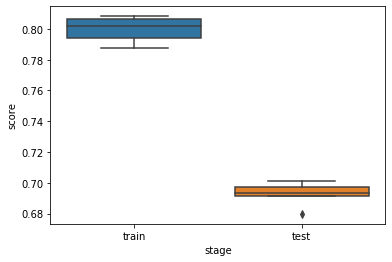

In [11]:
sns.boxplot(data = scores_df, x = 'stage', y = 'score')

In [13]:
FinalModel = MyMultiTrainTester.TrainerList[0]

In [15]:
FinalModel.model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5],
                         'n_estimators': [5, 10, 25, 50]},
             scoring=make_scorer(balanced_accuracy_score))

In [17]:
FinalModel.model.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=50)